In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("DailyDelhiClimateTest.csv")
df1.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [3]:
df2 = pd.read_csv("DailyDelhiClimateTrain.csv")
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df = pd.concat([df1,df2])
df.isnull().sum() # no null values

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


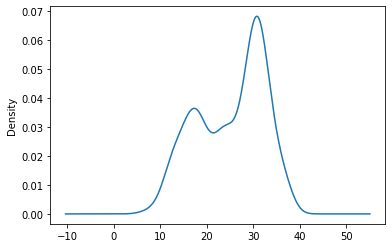

In [5]:
print(df["meantemp"].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


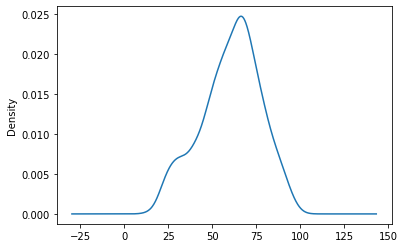

In [6]:
print(df['humidity'].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


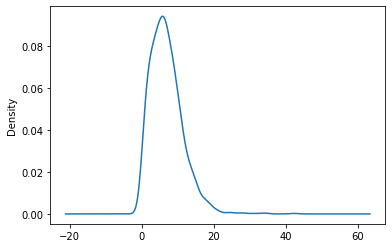

In [7]:
print(df['wind_speed'].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


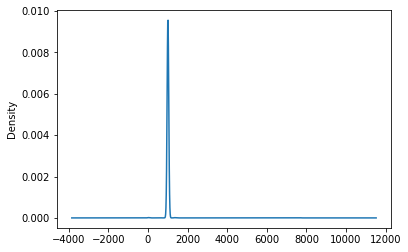

In [8]:
print(df['meanpressure'].plot.density()) #many outliers

AxesSubplot(0.125,0.125;0.775x0.755)


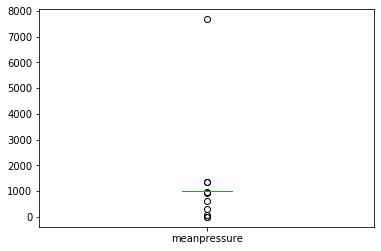

In [9]:
print(df["meanpressure"].plot.box()) #huge outlier at max value

In [10]:
print(df["meanpressure"].describe())

count    1576.000000
mean     1010.593178
std       175.242704
min        -3.041667
25%      1001.875000
50%      1009.055556
75%      1015.200000
max      7679.333333
Name: meanpressure, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


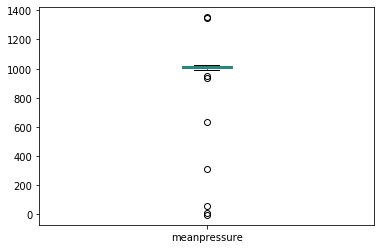

In [11]:
df = df.loc[df['meanpressure']!=df['meanpressure'].max()] # remove max value
print(df["meanpressure"].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


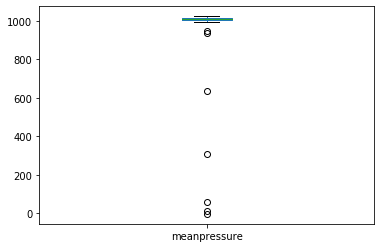

In [12]:
#still two more max outliers
for x in range(2):
    df = df.loc[df['meanpressure']!=df['meanpressure'].max()]
print(df["meanpressure"].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


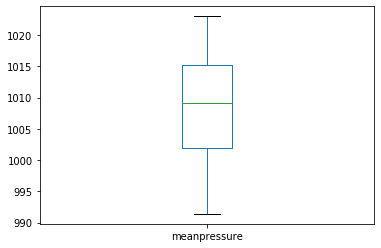

In [13]:
for x in range(7):
    df = df.loc[df['meanpressure']!=df['meanpressure'].min()]
print(df["meanpressure"].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


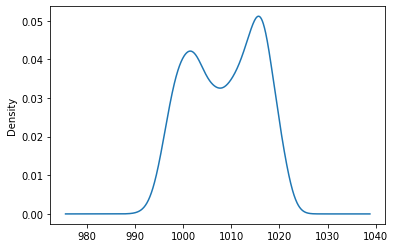

In [14]:
print(df['meanpressure'].plot.density())

In [15]:
# no more crazy outliers


In [16]:
# testing different linear regression models with different inputs

In [17]:
#1: humidity, wind speed and mean pressure
X = df[['humidity','wind_speed','meanpressure']]
y = df[['meantemp']]
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)


0.8664624585983443

In [18]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_test,y_predict)

regression_model_mse
import math
math.sqrt(regression_model_mse)

2.654545839973989

In [19]:
#2: wind speed and mean pressure
X = df[['wind_speed','meanpressure']]
y = df[['meantemp']]
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)


0.7946820519736894

In [20]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_test,y_predict)

regression_model_mse
import math
math.sqrt(regression_model_mse)

3.291561689536496

In [34]:
#3: humidity and mean pressure
X = df[['humidity','wind_speed','meanpressure']]
y = df[['meantemp']]
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)


0.8664624585983443

In [27]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_test,y_predict)

regression_model_mse
import math
math.sqrt(regression_model_mse)

2.666075772531371

In [ ]:
#The best model was the first one with all three parameters as inputs. 
#This model is still not particularly great because the R^2 value is still below 95 or even 90%
#The RSME score is above 1 which means these three inputs are not great at predicting mean temperature